# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
data=pd.read_csv('/content/drive/My Drive/Python Course/foodhub_order (1).csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
data.shape

(1898, 9)

No. of rows = 1898
No. of columns = 9

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


* Integer columns - order_id, customer_id, food_preparation_time, delivery_time
* Float columns - cost_of_the_order
* Object data type columns - restaurant_name, cuisine_type, day_of_the_week, rating

In [ ]:
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
None of the columns have null values


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# As seen from the head command above, the rating column have some of the values as 'Not given'. Let us find out how many.
data['rating'].value_counts()['Not given']



736

There are 736 ratings with value "Not given". They are not missing values, but the customers have not given any rating for these orders. We won't impute them because it is 736/1898*100 = 39 percent of data and imputing them with any values is not advisable. (If we really want to impute, we can take the mean rating for each restaurant and impute using fillna and transform functions - but that is not a good approach).

In [ ]:
#Let us change these values to NaN (Not a Number)
data['rating']=data['rating'].replace('Not given',np.nan)

In [ ]:
#Now let us change it to correct data type which is float/int
#we will change this to a numeric column, because we would like to know the statistics related to the ratings.
data['rating']=data['rating'].astype(float)

In [ ]:
#Let us change order_id and customer_id to categorical values
data['order_id']=data['order_id'].astype('object')
data['customer_id']=data['customer_id'].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


As seen above, the data types of the columns have been fixed

In [ ]:
#check the statistics of the numerical columns
data.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1162.000000,1898.000000,1898.000000
mean,16.498851,4.344234,27.371970,24.161749
std,7.483812,0.741478,4.632481,4.972637
min,4.470000,3.000000,20.000000,15.000000
25%,12.080000,4.000000,23.000000,20.000000
50%,14.140000,5.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


In [ ]:
#check the rows which has ratings as NaN - Not a Number
data.loc[data['rating'].isnull()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


In [ ]:
#check the relation between the missing ratings and the restaurant name
data.loc[data['rating'].isnull()==True,'restaurant_name'].value_counts(dropna=False)

,count
restaurant_name,
Shake Shack,86
The Meatball Shop,48
Blue Ribbon Sushi,46
Blue Ribbon Fried Chicken,32
Parm,29
...,...
The Loop,1
Schnipper's Quality Kitchen,1
Go! Go! Curry!,1


Can't find any relation between restaurant name and missing ratings. So the missing ratings are not for a restaurant or a small set of restaurants.

In [ ]:
#check if the missing data is for a particular cuisine type
data.loc[data['rating'].isnull()==True,'cuisine_type'].value_counts(dropna=False)

,count
cuisine_type,
American,216
Japanese,197
Italian,126
Chinese,82
Mexican,29
Indian,23
Middle Eastern,15
Mediterranean,14
Thai,10


Can't find any relation between cuisine and missing ratings

#### Observations:


* Around 39% of ratings were not given by the customers and it had value of 'Not given'. Since the ratio of missing values is high we won't impute the data because it might severely change the statistical properties of the dataframe.
* We changed the value of 'Not given' to NaN so that we can convert the column to a numeric data type.
* order_id and customer_id should not be float type and they were converted into Object type.
* Missing ratings did not follow any pattern

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1162.000000,1898.000000,1898.000000
mean,16.498851,4.344234,27.371970,24.161749
std,7.483812,0.741478,4.632481,4.972637
min,4.470000,3.000000,20.000000,15.000000
25%,12.080000,4.000000,23.000000,20.000000
50%,14.140000,5.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


#### Observations:

Minimum time for food preparation is 20 minutes

maximum time for food preparation is 35 minutes

Average time for food preparation is 27.37 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


#### Observations:

736 ratings value are missing.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
data['order_id'].nunique()

1898

All order_ids are unique as expected. Nothing further needs to be analyzed on this column.

In [ ]:
data['customer_id'].nunique()

1200

There are 1200 unique customers

In [ ]:
data['customer_id'].value_counts().head()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


These are the 5 customers with most number of orders

In [ ]:
#let us see how many unique restaurants are there

data['restaurant_name'].nunique()

178

In [ ]:
#let us see how many unique cuisines are there
data['cuisine_type'].nunique()

14

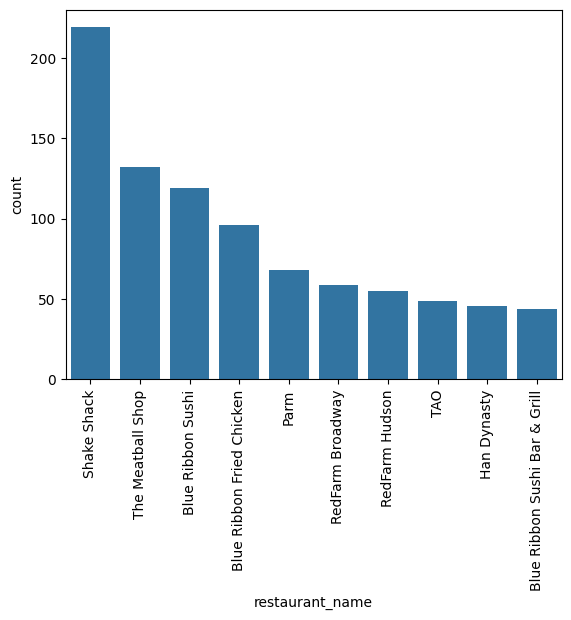

In [ ]:
#Let us find out top 10 restaurants in terms of order placed
sns.barplot(data['restaurant_name'].value_counts().head(10))
plt.xticks(rotation=90)
plt.show()

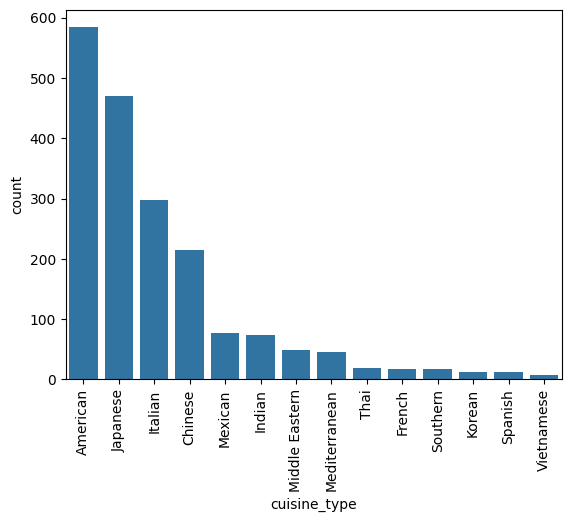

In [ ]:
#Let us analyse the number of orders per cuisine
sns.barplot(data['cuisine_type'].value_counts())
plt.xticks(rotation=90)
plt.show()

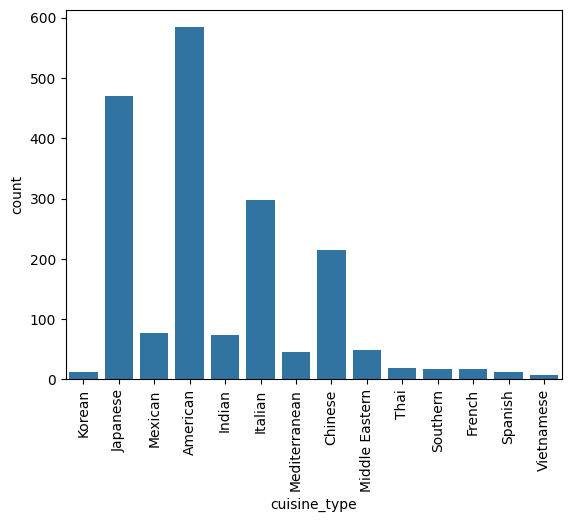

In [ ]:
#The same can be displayed using countplot as well
sns.countplot(data=data,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

American, Japanese and Italian are the 3 most top selling cuisine and Vietnamese is the least ordered

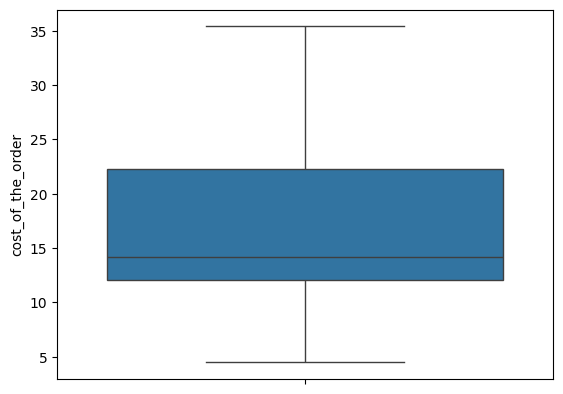

In [ ]:
#Let us analyze cost_of_the_order
sns.boxplot(data['cost_of_the_order'])
plt.show()

35 dollar is the maximum cost of an order and the minimum is 5 dollars.
There are no outliers.
25th percentile is close to 12 dollars and 75th percentile is close to 22 dollars and the mean is close to 14 dollars.

In [ ]:
#let us find the relation between cost of the order and the number of orders placed in a restaurant - to check if the cost is driving the sales down
#Let us find the mean cost of the order for each restaurant
df1=data.groupby('restaurant_name')['cost_of_the_order'].mean()
#let us rename the column name
df1.rename('mean_cost',inplace=True)
#Let us find the number of orders for each restaurant
df2=data.groupby('restaurant_name')['cost_of_the_order'].count()
#let us rename the column name
df2.rename('order_count',inplace=True)
#Let us merge the two dataframes
df3=pd.merge(df1,df2,how='inner',on='restaurant_name')
df3

,mean_cost,order_count
restaurant_name,,
'wichcraft,8.100000,1
12 Chairs,22.142500,4
5 Napkin Burger,15.968000,5
67 Burger,29.050000,1
Alidoro,12.610000,1
...,...,...
Zero Otto Nove,9.025000,2
brgr,9.895000,2
da Umberto,17.620000,3


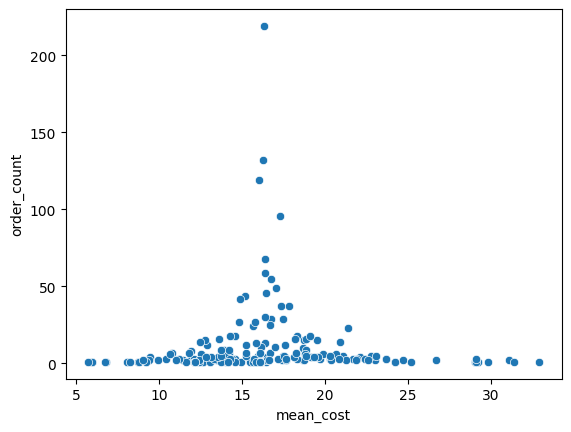

In [ ]:
sns.scatterplot(data=df3,x='mean_cost',y='order_count')
plt.show()

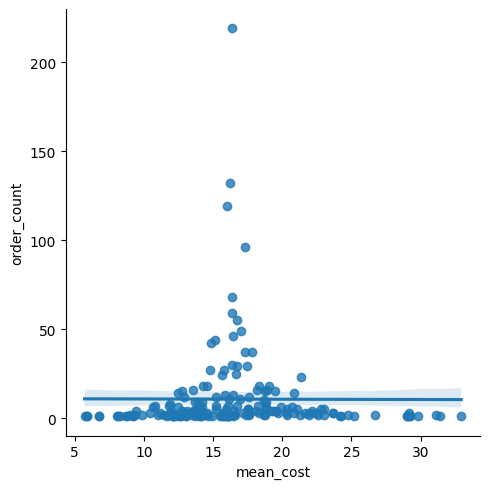

In [ ]:
sns.lmplot(data=df3,x='mean_cost',y='order_count')
plt.show()

There is no relation between the number of orders placed from a restaurant and the mean cost of the order from the restaurant

In [ ]:
#let us find the relation between average rating of a cuisine and the number of orders placed in that cuisine
#Let us find the mean cost of the order for each cuisine
df1=data.groupby('cuisine_type')['rating'].mean()
#let us rename the column name
df1.rename('mean_rating',inplace=True)
#Let us find the number of orders for each cuisine
df2=data.groupby('cuisine_type')['rating'].count()
#let us rename the column name
df2.rename('order_count',inplace=True)
#Let us merge the two dataframes
df3=pd.merge(df1,df2,how='inner',on='cuisine_type')
df3

,mean_rating,order_count
cuisine_type,,
American,4.298913,368
Chinese,4.338346,133
French,4.300000,10
Indian,4.540000,50
Italian,4.360465,172
Japanese,4.373626,273
Korean,4.111111,9
Mediterranean,4.218750,32
Mexican,4.416667,48


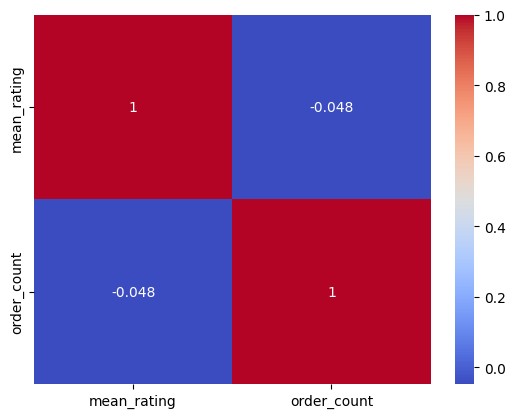

In [ ]:
#let us find the correlation between the 2
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')
plt.show()

There is no correlation


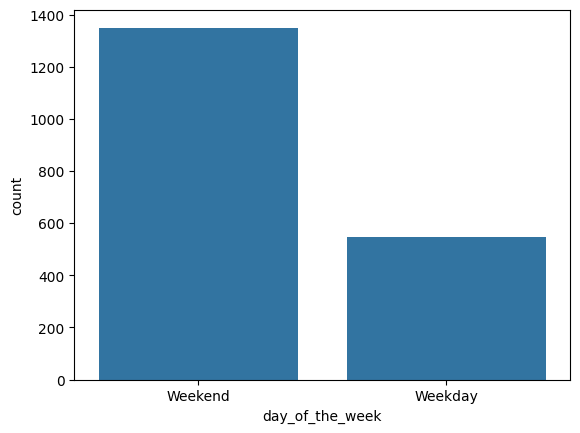

In [ ]:
#Let us analyze the trend over weekday and weekends.
sns.barplot(data['day_of_the_week'].value_counts())
plt.show()

Around 70% of the orders are placed on the weekend

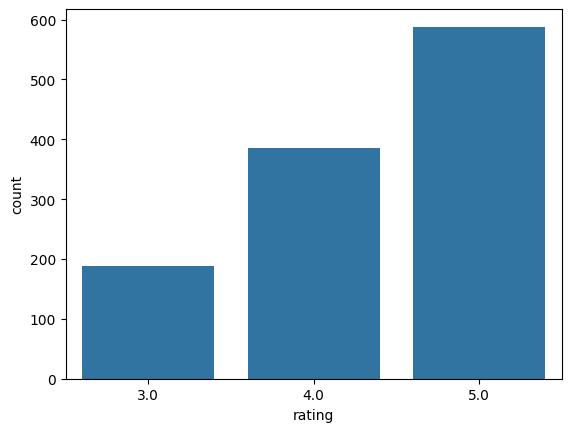

In [ ]:
sns.barplot(data['rating'].value_counts())
plt.show()

There are no orders with rating 0, 1 or 2. Most of the orders are 5-rated and is close to 600. One-third of the total orders are 5-rated.

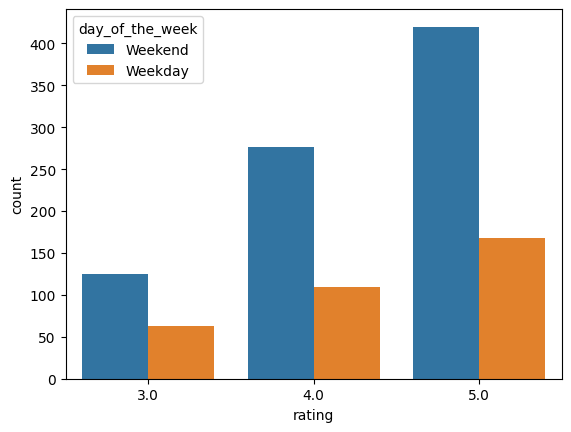

In [ ]:
sns.countplot(data=data,x='rating',hue='day_of_the_week')
plt.show()

This aligns with the ratio of orders placed on the weekdays and weekends

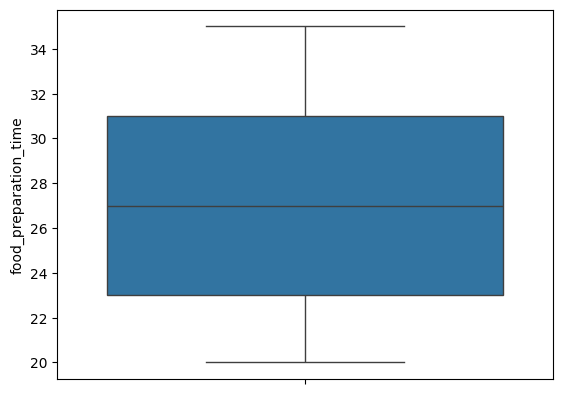

In [ ]:
sns.boxplot(data['food_preparation_time'])
plt.show()


There are no outliers. The maximum time taken to prepare an order is 35 minutes and the minimum taken for an order is 20 minutes. The mean is 27 minutes, 25 percentile is 23 minutes and 75th percentile is 31 minutes.

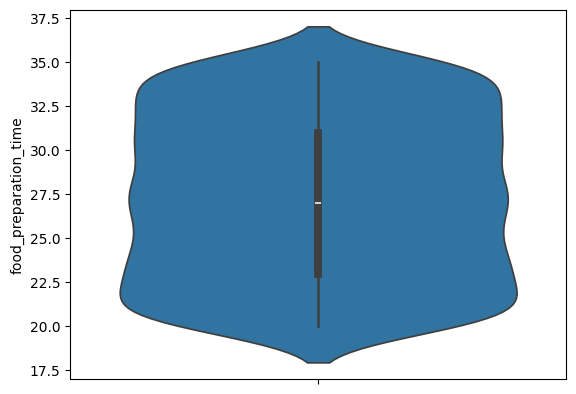

In [ ]:
sns.violinplot(data['food_preparation_time'])
plt.show()

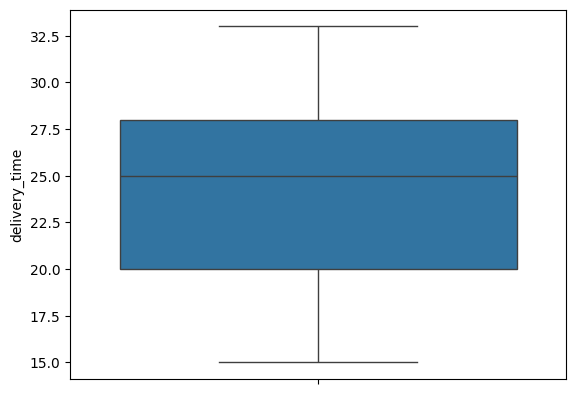

In [ ]:
sns.boxplot(data['delivery_time'])
plt.show()

There are no outliers in this data. The minimum delivery time taken is 15 minutes, the maximum is close to 33 minutes, the mean is 25 minutes. 25th percentile is 20 minutes and the 75th percentile is 28 minutes.

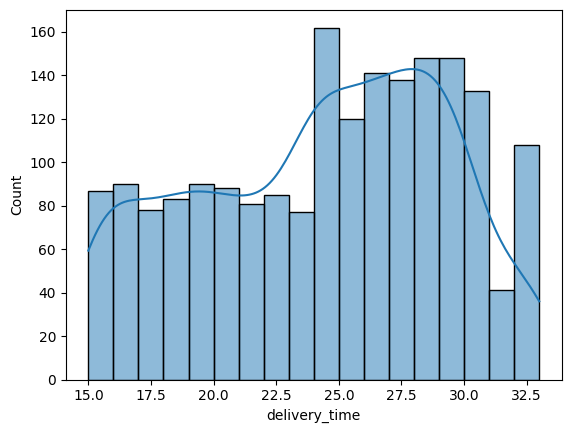

In [ ]:
sns.histplot(data['delivery_time'],kde=True,bins=18)
plt.show()

Most of the deliveries take from 24 minutes to 30 minutes.
Histogram is left-skewed.

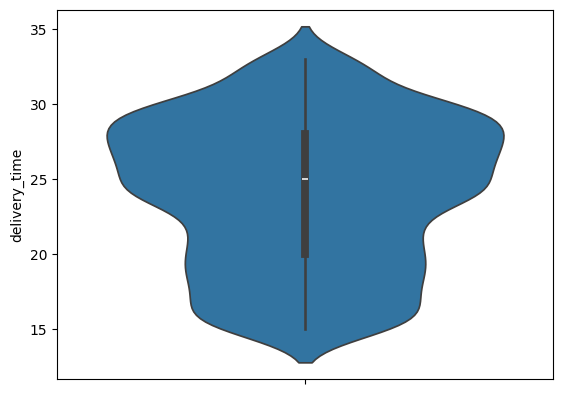

In [ ]:
sns.violinplot(data['delivery_time'])
plt.show()

Violin plot also says the same  - Most of the deliveries take from 24 minutes to 30 minutes.


In [ ]:
#Let us find out the cuisines which had more than 50 orders and mean rating is more than 4
df1=data.groupby('cuisine_type')['rating'].mean()
df1a=df1.loc[df1>4]
df1a
df2=data.groupby('cuisine_type')['rating'].count()
df2a=df2.loc[df2>50]
df2a
pd.merge(df1a,df2a,how='inner',on='cuisine_type')

,rating_x,rating_y
cuisine_type,,
American,4.298913,368
Chinese,4.338346,133
Italian,4.360465,172
Japanese,4.373626,273


##Observations

Most orders by a single customer = 13

There are 178 unique restaurants

Shake shack, meatball shop and blue ribbon Sushi has the most orders

American, Japanese and Italian are the most selling cuisines

Cost of order - 35 dollar is the maximum cost of an order and the minimum is 5 dollars. There are no outliers. 25th percentile is close to 12 dollars and 75th percentile is close to 22 dollars and the mean is close to 14 dollars.

70% of the orders are done on the weekend

There are no orders with rating 0, 1 or 2. Most of the orders are 5-rated and is close to 600. One-third of the total orders are 5-rated.

Food preparation time - There are no outliers. The maximum time taken to prepare an order is 35 minutes and the minimum taken for an order is 20 minutes. The mean is 27 minutes, 25 percentile is 23 minutes and 75th percentile is 31 minutes. The mode is at 35 minutes

Delivery time - There are no outliers in this data. The minimum delivery time taken is 15 minutes, the maximum is close to 33 minutes, the mean is 25 minutes. 25th percentile is 20 minutes and the 75th percentile is 28 minutes.Most of the deliveries take from 24 minutes to 30 minutes Histogram is left-skewed.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

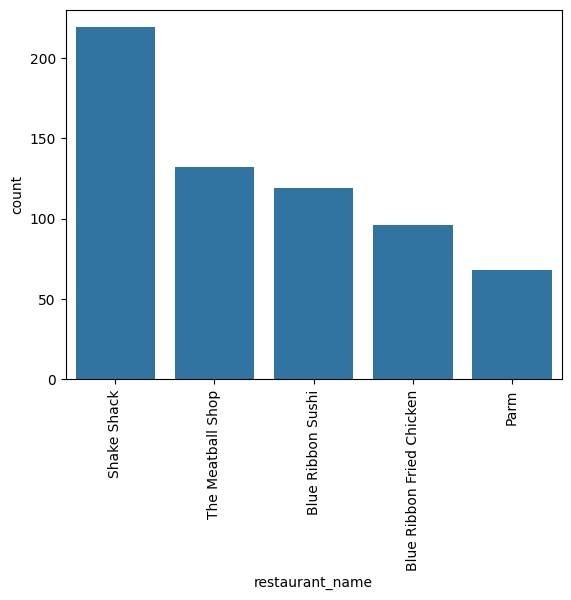

In [ ]:
sns.barplot(data['restaurant_name'].value_counts().head())
plt.xticks(rotation=90)
plt.show()

#### Observations:
As seen from the above graph, the following restaurants are the restaurants with top 5 orders -
1. Shake Shack
2. The meatball shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

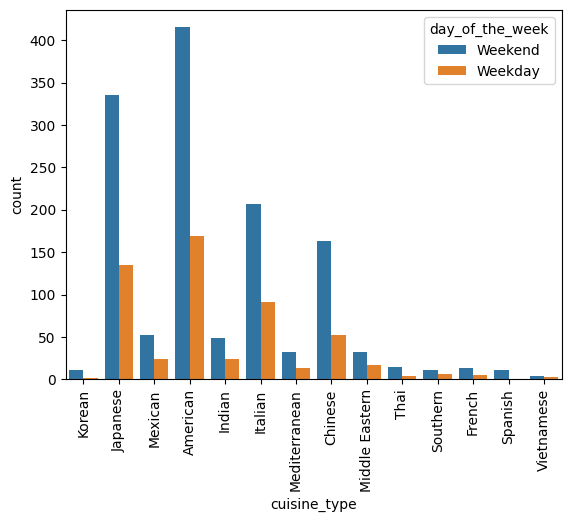

In [ ]:
sns.countplot(data=data,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Most popular cuisine on the weekend is American with more than 400 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
data[data['cost_of_the_order']>20]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,NaN,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3.0,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4.0,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17


In [ ]:
data[data['cost_of_the_order']>20].shape[0]/data.shape[0]*100

29.24130663856691

#### Observations:
Around 29.24% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

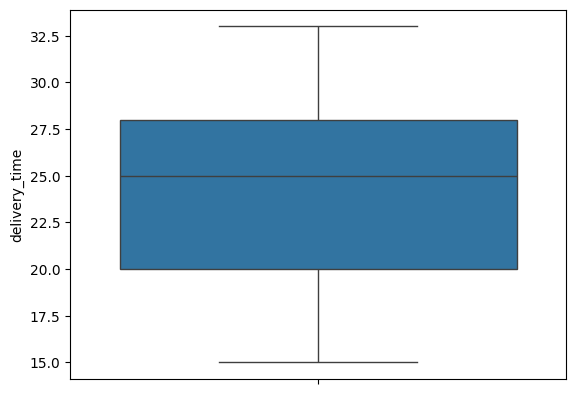

In [ ]:
sns.boxplot(data['delivery_time'])
plt.show()

#### Observations:
The mean delivery time is 25 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

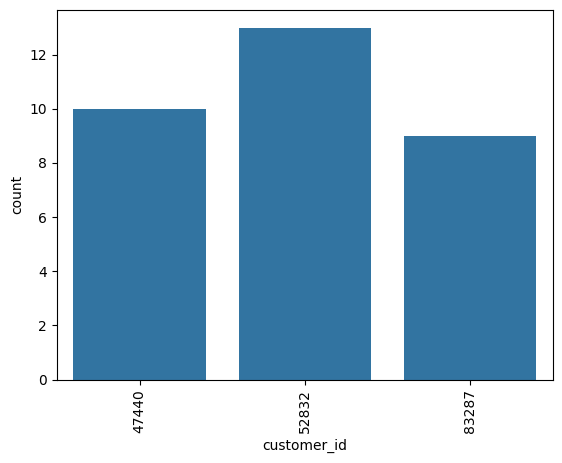

In [ ]:
sns.barplot(data['customer_id'].value_counts().head(3))
plt.xticks(rotation=90)
plt.show()

#### Observations:
The top 3 customers and their number of orders are:
1. 52832 with 13 orders
2. 47440 with 10 orders
3. 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


## First let us perform Bivariate analysis

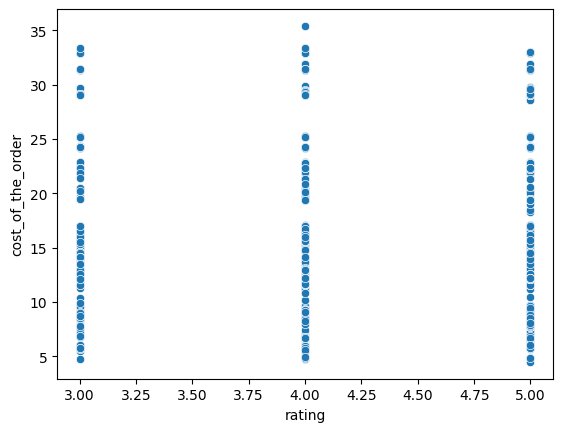

In [ ]:
#Let us do a bivariate analysis on ratings which is the most important column in the dataframe
sns.scatterplot(data=data,x='rating',y='cost_of_the_order')
plt.show()

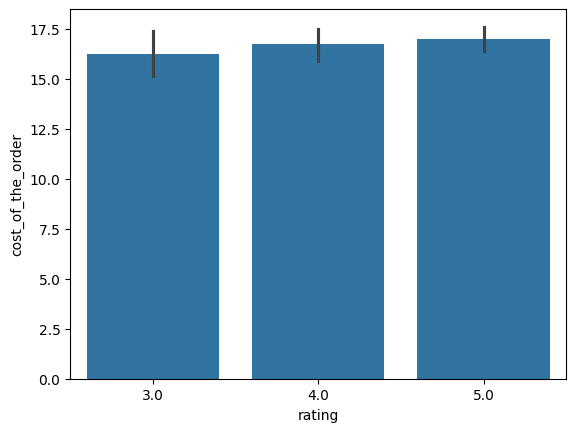

In [ ]:
sns.barplot(data=data,x='rating',y='cost_of_the_order')
plt.show()

Can't find any strong correlation between the cost of the order and ratings

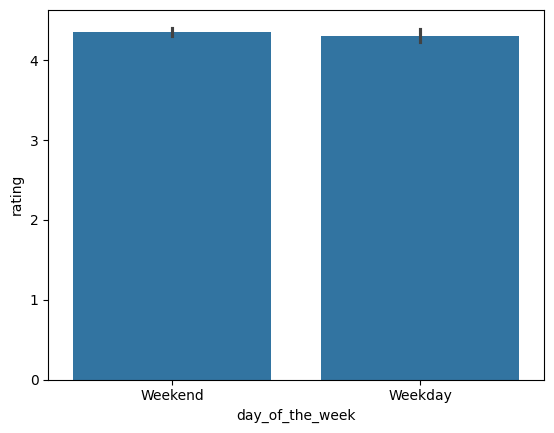

In [ ]:
sns.barplot(data=data,x='day_of_the_week',y='rating')
plt.show()

Customers are giving similar ratings on weekend and weekday.(The above graph shows the mean ratings)

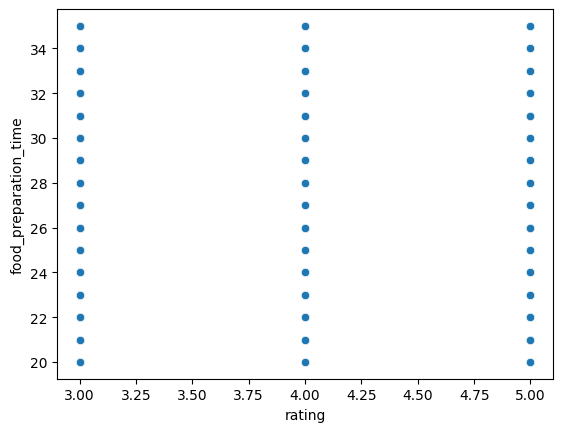

In [ ]:
sns.scatterplot(data=data,x='rating',y='food_preparation_time')
plt.show()

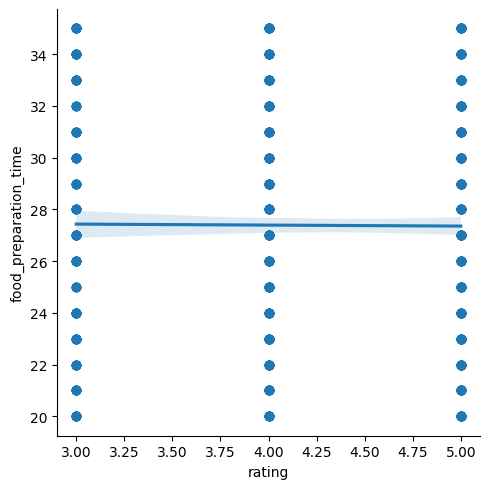

In [ ]:
sns.lmplot(data=data,x='rating',y='food_preparation_time')
plt.show()

There is no correlation between food preparation time and rating

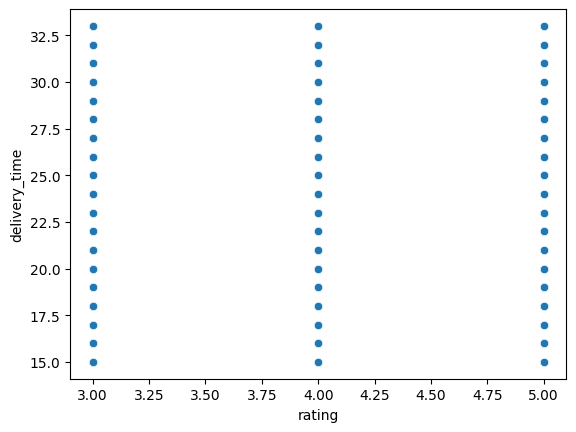

In [ ]:
sns.scatterplot(data=data,x='rating',y='delivery_time')
plt.show()

Can't see any relation of cost, food preparation time and delivery time with ratings.

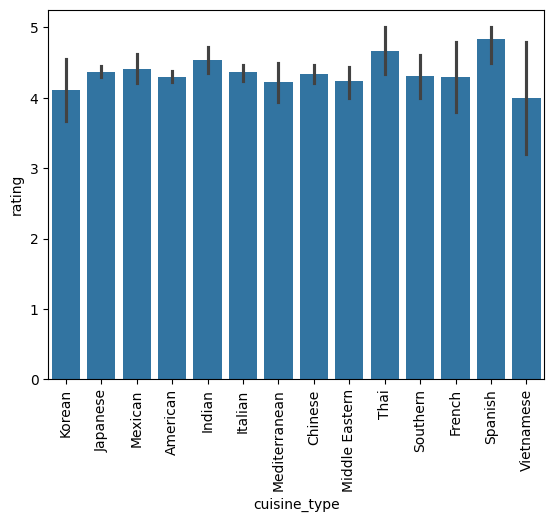

In [ ]:
#Let us find the relation between ratings and cuisine
sns.barplot(data=data,x='cuisine_type',y='rating')
plt.xticks(rotation=90)
plt.show()

spanish cuisine has the greatest mean rating

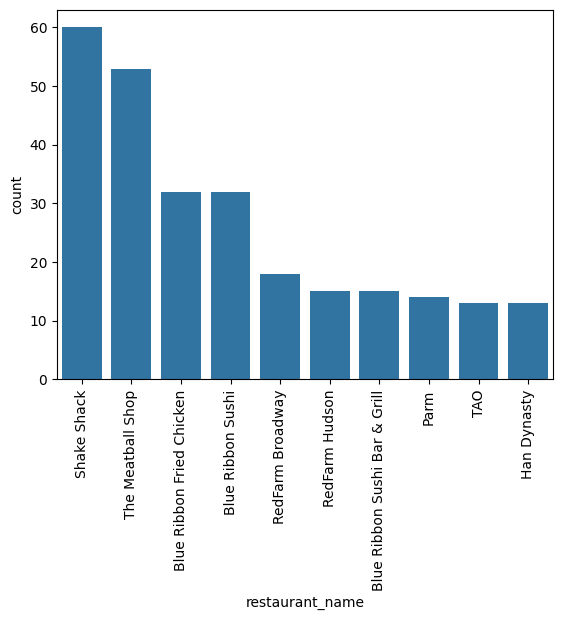

In [ ]:
#Let us find out the restaurants which had the most number of 5 star ratings
sns.barplot(data.loc[data['rating']==5,'restaurant_name'].value_counts().head(10))
plt.xticks(rotation=90)
plt.show()


Shake shack, The meatball shop and Blue Ribbon Fried Chicken restaurants had the most number of 5 star ratings.

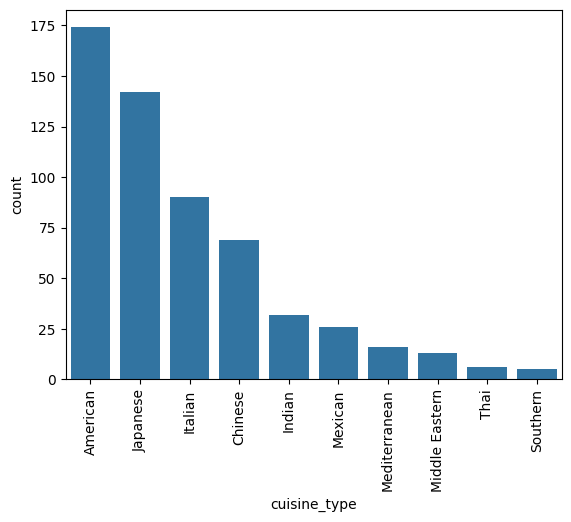

In [ ]:
#Let us find out the cuisine which had the most number of 5 star ratings
sns.barplot(data.loc[data['rating']==5,'cuisine_type'].value_counts().head(10))
plt.xticks(rotation=90)
plt.show()

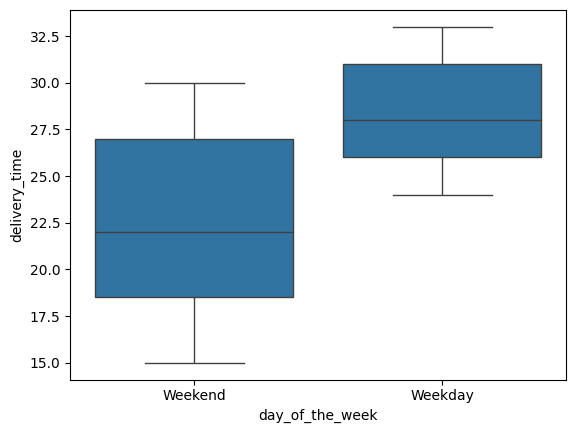

In [ ]:
#Let us find out the delivery time variation between weekend and weekday
sns.boxplot(data=data,x='day_of_the_week',y='delivery_time')
plt.show()

Delivery time on the weekdays are higher when compared to weekends. It could be because of more traffic.

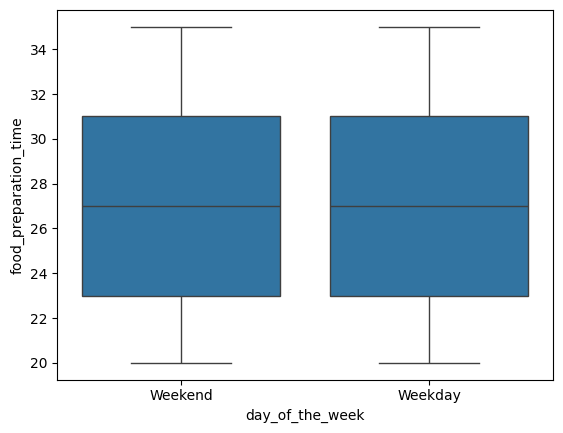

In [ ]:
#Let us find out the food preparation time variation between weekend and weekday
sns.boxplot(data=data,x='day_of_the_week',y='food_preparation_time')
plt.show()

There is absolutely no difference

##Now let us start multivariate analysis


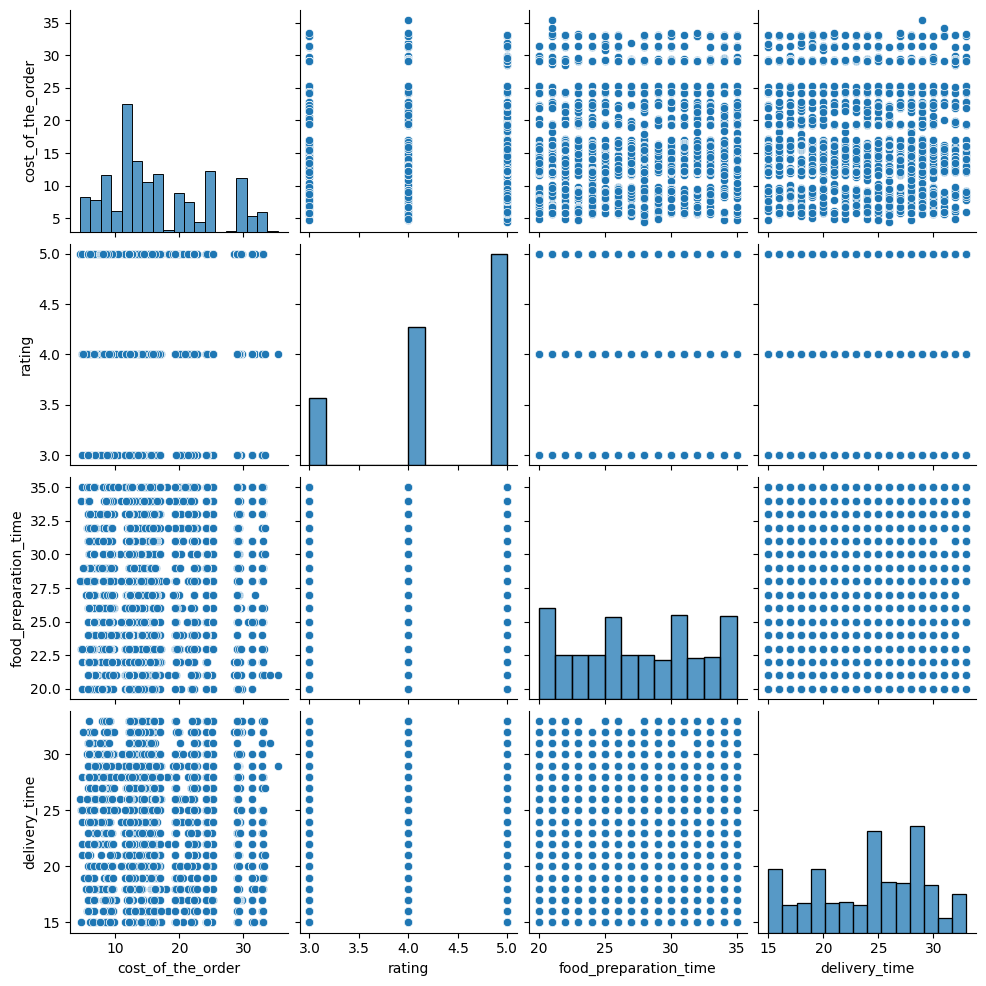

In [ ]:
#Let us check if there are any correlation between the numeric variables
sns.pairplot(data=data[['cost_of_the_order','rating','food_preparation_time','delivery_time']])
plt.show()

###Observation
Can't find any correlation between the numeric variables

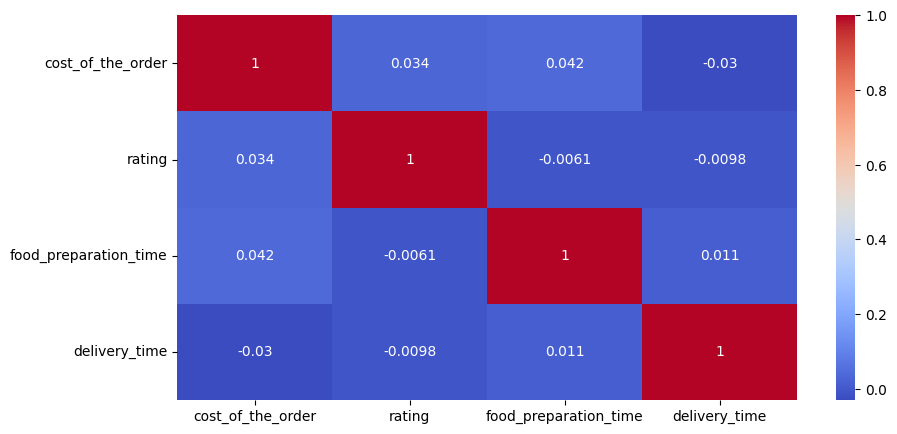

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=data[['cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(),annot=True,cmap='coolwarm')
plt.show()

###Observation
Heat map also suggests the same - there is no correlation between the numeric variables including rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# We have to find the restaurants having a rating count of more than 50 and average rating should be greater than 4
#data.groupby('restaurant_name')['rating'].count()>50
df1=data.groupby('restaurant_name')['rating'].mean()
df1a=df1.loc[df1>4]
df2=data.groupby('restaurant_name')['rating'].count()
df2a=df2.loc[df2>50]
pd.merge(df1a,df2a,how='inner',on='restaurant_name')

,rating_x,rating_y
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observations:
These 4 restaurants have a mean rating of 4 or more and have more than 50 ratings in total


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
data[data['cost_of_the_order']>20]['cost_of_the_order'].sum()*0.25 + data[(data['cost_of_the_order']>5) & (data['cost_of_the_order']<=20)]['cost_of_the_order'].sum() * 0.15

6166.303

#### Observations:
The net revenue of the company is 6166.30 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Create a new column with this information
data['total_time']=data['food_preparation_time']+data['delivery_time']
data[data['total_time']>60].shape[0]/data.shape[0]*100

10.537407797681771

#### Observations:
Around 10% of the orders take 60 minutes in total


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

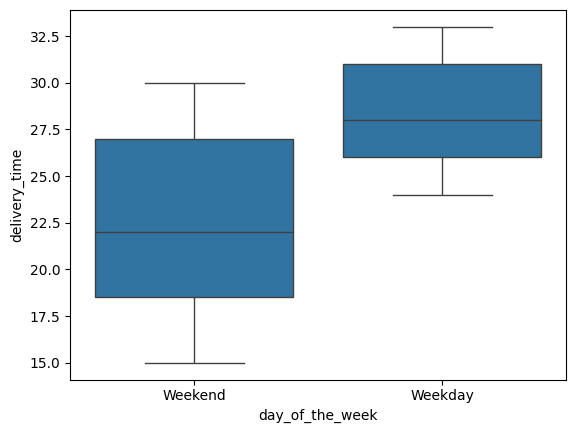

In [ ]:
# Write the code here
sns.boxplot(data=data,x='day_of_the_week',y='delivery_time')
plt.show()

The delivery time on the weekend ranges from 15 minutes to 30 minutes.
The delivery time on the weekday ranges from 24 minutes to 33 minutes.
The mean delivery time on weekend is 22 minutes and on the weekday it is 28 minutes. So there is a difference of 6 minutes.

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Only 4 cuisines had 50 or more ratings - they are American, Japanese, Chinese and Italian and all 4 had average ratings more than 4.
* Blue Ribbon, Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop had more than 50 orders and maintained a mean rating greater than 4.
* Shake shack, The meatball shop and Blue Ribbon Sushi had the maximum number of orders.
* Shake shack, The meatball shop and Blue Ribbon Fried Chicken restaurants had the greatest number of 5-star ratings.
* American is the most popular cuisine on the weekend followed by Japanese and Italian.
* American is the most popular cuisine on the weekday followed by Japanese and Italian.

* American, Japanese and Italian cuisines had the most 5-star ratings.

* There are no orders rated below 3 ratings, which is a good thing - which means we are doing business with only good restaurants. One third of the orders are 5-rated.

* 39% of the orders were not rated. Missing ratings does not follow any definite pattern.
* Food preparation takes from 20 minutes to 35 minutes with a mean of 27.37 minutes.
* The delivery time varies from 15 minutes to 33 minutes, the mean is 25 minutes. Most of the deliveries take 24 minutes to 30 minutes.
* The delivery time taken on the weekday is more compared to the weekend.
* Around 10% of the orders take 60 minutes or more from order placed to delivery.
* We have data from 1200 unique customers.
* We have data from 178 unique restaurants.
* The data is spread across 14 different cuisines.

* Cost the orders varies from 5 dollars to 35 dollars with a mean close to 14 dollars.
* 29% of the orders cost more than 20 dollars.
* There is no relation between the mean cost of an order from a restaurant and the number of orders made from the restaurant.(Was checkign for Negative correlation - but no correlation at all)
* Around 70% of the orders are made on the weekend.

* The 3 most number of orders placed by a single customer is 13, 10 and 9.

* The net revenue of the company is 6166.30 dollars.


### Recommendations:

*  Around 30% of the ratings are missing, we have to coerce the customers to give the ratings so that we have good data for analytics.
* American, Japanses, Chinese and Italian restaurants are the drivers for growth.

* Blue Ribbon, Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop had more than 50 orders and maintained a mean rating greater than 4. We have to provide incentives to them.

* There are no orders rated below 3 ratings, which is a good thing - which means we are doing business with only good restaurants. One third of the orders are 5-rated.

* The delivery time taken on the weekday is more compared to the weekend. We will have to see how we can speed up the delivery time on the weekdays.

* Around 10% of the orders take 60 minutes or more from order placed to delivery. 60 minutes is a huge time period between order placed and order delivered, we have to check how we can bring this down.

* Cost the orders varies from 5 dollars to 35 dollars with a mean close to 14 dollars.29% of the orders cost more than 20 dollars. Most of the business are at the lower end of the spectrum, we have drive growth in the higher cost orders to get more revenue.

* Around 70% of the orders are made on the weekend. We will have to find avenues to increase the number of orders on the weekend.

* The 3 most number of orders placed by a single customer is 13, 10 and 9. We have to give incentives to customers who makes the most number of orders.

---